<a href="https://colab.research.google.com/github/SwapnanilHalder/practical-deep-learning-with-pytorch-master/blob/master/trial_CNN_MNIST_with_pytorch(fast.ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable

from torchvision import transforms
from torchvision import datasets
print(torch.cuda.is_available())
torch.backends.cudnn.benchmark = True
is_cuda = True

True


In [26]:
!nvidia-smi

Sat May 16 22:01:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |    887MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root = './data',
                              train = False,
                              transform=transforms.ToTensor(),
                              download = True)

In [28]:
batch_size = 100
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))
print(num_epochs)

10


In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size, shuffle=False)

#### Here you have to calculate in_features. (i.e. no. of features for a single number photo)
#### P : padding
#### O : output height/lenght
#### I : input height
#### K : kernel size
#### S : Stride

#### P = (k-1)/2 for O == I

#### O = (I- K+ 2P)/S  +  1  

#### here, after 
#### cnn1 : (28,28) > (16,28,28)  16 is no. of kernel used
#### maxpool1 : (16,28,28) > (16, 14, 14) as filtersize used in maxpool = 2
#### cnn2 : (16, 14, 14) > (32, 14, 14)
#### maxpool2 : (32,14,14) > (32,7,7)

#### total : 32*7*7

In [0]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ELU()
        
        # Max pool 1
        # self.maxpool1 = nn.AdaptiveMaxPool2d(kernel_size=2)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ELU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected (readout)
        # The trick to calc in_features is put anything there, 
        # while output = model(image), the error will tell you the right dimention of in_features
        self.fc = nn.Linear(in_features=40*14*14, out_features=10)
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        # out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        # Resize
        # Original size : (100, 32, 7, 7)
        # out.size(0) : 100
        # New out size : (100, 32*7*7)
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc(out)
        
        return out

In [0]:
model = CNNModel()
if is_cuda == True:
    model.cuda()

In [0]:
# model = nn.Sequential(
#     nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=2),
#     nn.ELU(),
    
#     nn.MaxPool2d(kernel_size=2),
    
#     nn.Conv2d(in_channels=20, out_channels=40, kernel_size=5, stride=1, padding=2),
#     nn.ELU(),
    
#     nn.MaxPool2d(kernel_size=2),
    
#     nn.Flatten(),
#     nn.Linear(in_features=40*7*7, out_features=10)
# )

# if is_cuda == True:
#     model.cuda()

In [33]:
for param in model.parameters():
  print(param.data)

tensor([[[[ 0.1408, -0.0918,  0.0343, -0.0339, -0.1196],
          [-0.1978,  0.0008, -0.0693, -0.1798,  0.1743],
          [ 0.0143, -0.0879,  0.1733,  0.1069, -0.0066],
          [ 0.0940,  0.1524,  0.0679, -0.1271,  0.0401],
          [-0.0994, -0.0581,  0.1403, -0.0575,  0.1663]]],


        [[[ 0.1858, -0.1381,  0.0427, -0.1753,  0.1929],
          [-0.0418,  0.0222,  0.1037,  0.0801,  0.1323],
          [-0.0852,  0.0487, -0.0175,  0.1739, -0.0814],
          [-0.0769,  0.0951,  0.0809, -0.0711, -0.1036],
          [-0.0231,  0.0399,  0.1513,  0.1661, -0.1757]]],


        [[[ 0.1078, -0.0970,  0.0488, -0.0294,  0.0241],
          [ 0.0117,  0.1911, -0.1114,  0.0700, -0.1459],
          [-0.1798, -0.0092, -0.1549,  0.0779,  0.0004],
          [ 0.0677,  0.1661, -0.0162, -0.1147, -0.1400],
          [ 0.0313,  0.0676, -0.0542,  0.1045, -0.0928]]],


        [[[-0.1746, -0.0873, -0.0618,  0.0839, -0.0931],
          [-0.0282, -0.1160,  0.1746,  0.0922,  0.0235],
          [ 0.1319,

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
data = DataBunch.create(train_ds = train_dataset, valid_ds = test_dataset, bs = batch_size)
learner = Learner(data, model, loss_func=F.cross_entropy, metrics=[accuracy], opt_func= torch.optim.SGD)
learner.clip = 0.1

In [37]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


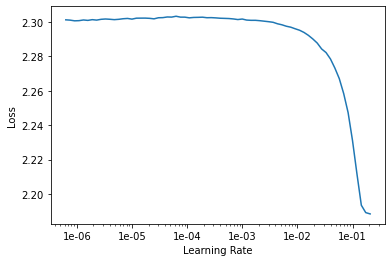

In [38]:
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(10, 5e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.124046,0.081132,0.974600,00:06
1,0.080190,0.051846,0.982500,00:06
2,0.070663,0.062014,0.979000,00:06
3,0.056074,0.051608,0.981400,00:06
4,0.055305,0.059188,0.981100,00:06
5,0.049187,0.044886,0.985000,00:06
6,0.037984,0.046587,0.983100,00:06


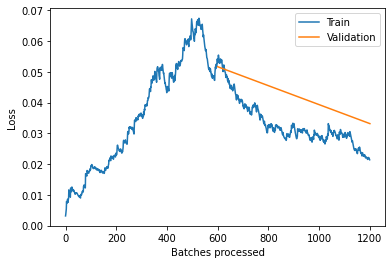

In [24]:
learner.recorder.plot_losses()


In [0]:
learning_rate = 5e-02

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [29]:
# No. of parameters layer
print(len(list(model.parameters())))

# No of parameters in 1st layer:
print(list(model.parameters())[0].size())

# No of parameters in 2nd layer:
print(list(model.parameters())[1].size())

# Conv. 2: 32 kernels with depth 16 each:
print(list(model.parameters())[2].size())

# Conv. 2 Bias : 32 kernels with depth 16 each:
print(list(model.parameters())[3].size())

# Fully connected layer:
print(list(model.parameters())[4].size())

# Fully connected layer size:
print(list(model.parameters())[5].size())

6
torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([40, 20, 5, 5])
torch.Size([40])
torch.Size([10, 7840])
torch.Size([10])


In [0]:
model1 = CNNModel()
if is_cuda == True:
    model1.cuda()

In [22]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        if is_cuda == True:
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()
        
        outputs = model1(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter +=1
        if iter % 600 == 0:
            correct = 0
            total = 0
            
            for images_t, labels_t in test_loader:
                images_t = Variable(images_t)
                labels_t = Variable(labels_t)
                if is_cuda == True:
                    images_t = images_t.cuda()
                    labels_t = labels_t.cuda()
                    
                outputs_t = model1(images_t)
                _, predicted_t = torch.max(outputs_t.detach(), 1)
                total += labels_t.size()[0]
                correct += (predicted_t == labels_t).sum()
                
            accuracy = 100 * int(correct) / total
            
            print("Epoch: {}, loss: {}, Accuracy: {}".format(iter/600, loss, accuracy))

Epoch: 1.0, loss: 2.3141417503356934, Accuracy: 8.09
Epoch: 2.0, loss: 2.3003687858581543, Accuracy: 8.09
Epoch: 3.0, loss: 2.299452304840088, Accuracy: 8.09
Epoch: 4.0, loss: 2.304258108139038, Accuracy: 8.09
Epoch: 5.0, loss: 2.302037000656128, Accuracy: 8.09


KeyboardInterrupt: ignored

In [0]:
predicted_t

tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6], device='cuda:0')

In [0]:
labels_t

tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6], device='cuda:0')

In [0]:
(predicted_t == labels_t)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       device='cuda:0')

In [0]:
torch.save(model.state_dict(), 'model.ckpt')

In [0]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Generate predictions
    xb = xb.cuda()
    yb = yb.cuda()
    preds = model(xb)
    # Calculate loss
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result